# Домашняя работа

1. Теперь решаем задачу регрессии - предскажем цены на недвижимость. Использовать датасет https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data (train.csv)
2. Построить случайный лес, вывести важность признаков
3. Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную
4. В качестве решения: Jupyter notebook с кодом, комментариями и графиками

In [45]:
from sklearn.model_selection import train_test_split
from itertools import combinations_with_replacement
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from functools import *
import pandas as pd
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, BayesianRidge, SGDRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [154]:
data = pd.read_csv('train_2.csv')

In [155]:
def nan_transform_series(series):
    if series.dtype not in ['int32', 'int64', 'float64', 'float32']:
        series[series.isnull()] = 'NaN'
    else:
        series[series.isnull()] = series.mean()
    return series

def nan_transform(data, *a, **k): 
    data2 = data.copy()
    if data2.__class__.__name__ == 'DataFrame':
        data2 = data2.apply(nan_transform_series)
        return data2
    elif data2.__class__.__name__ == 'Series':
        return nan_transform_series(data2)
    else:
        print('Input data format dismatch!')
        return data2
           
def le_series(data, *a, **k):
    if data.dtype not in ['int32', 'int64', 'float64', 'float32']:
        return LabelEncoder().fit_transform(data)
    else:
        return data
    
def le(data, *a, **k):
    data2 = data.copy()
    for col in data2:
        data2[col] = pd.Series(le_series(data2[col]), name = col)
    return data2

In [156]:
data2 = le(nan_transform(data))
y = data2.SalePrice
X = data2.drop(y.name, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\Users\alexe\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\alexe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.8633201527001985

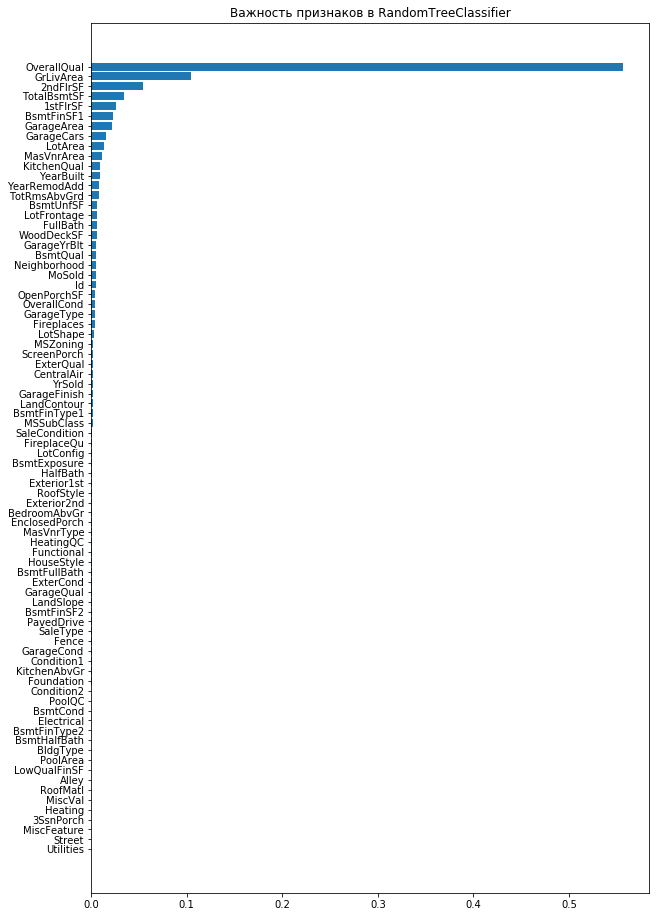

In [157]:
dtree = model
dtree_feat = pd.DataFrame({'feat_name':X.columns, 'feat_importance':dtree.feature_importances_}).sort_values(by = 'feat_importance', ascending=True)
plt.barh(dtree_feat.feat_name, dtree_feat.feat_importance)
plt.title('Важность признаков в RandomTreeClassifier')
plt.gcf().set_size_inches(10,16)

2. Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную

In [142]:
models = [RandomForestRegressor(), LinearRegression(), BayesianRidge(), SGDRegressor()]

models_comb = list(combinations_with_replacement(models, 4))
results = pd.DataFrame()
for model_set in models_comb:
    models_name = list(zip(['m'+str(x) for x in range(1, len(model_set)+1)], model_set))
    model = StackingRegressor(models_name[:-1], models_name[-1][1])
    score = model.fit(X_train, y_train).score(X_test, y_test)
    results = results.append({'score':score, 'models':model_set}, ignore_index = True)

In [145]:
results.sort_values(by='score', ascending=False)

,models,score
2,"(RandomForestRegressor(), RandomForestRegresso...",8.457748e-01
4,"(RandomForestRegressor(), RandomForestRegresso...",8.428605e-01
5,"(RandomForestRegressor(), RandomForestRegresso...",8.425409e-01
7,"(RandomForestRegressor(), RandomForestRegresso...",8.416400e-01
16,"(RandomForestRegressor(), BayesianRidge(), Bay...",8.413416e-01
11,"(RandomForestRegressor(), LinearRegression(), ...",8.400173e-01
13,"(RandomForestRegressor(), LinearRegression(), ...",8.397284e-01
1,"(RandomForestRegressor(), RandomForestRegresso...",8.390791e-01
10,"(RandomForestRegressor(), LinearRegression(), ...",8.388521e-01
0,"(RandomForestRegressor(), RandomForestRegresso...",8.086265e-01


In [152]:
best_set = results.sort_values(by='score', ascending=False).iloc[0,0]
best_score = results.sort_values(by='score', ascending=False).iloc[0,1]
print(f'Лучший результат {best_score} достигается на ансамбле из\n{best_set[:-1]} \nс финальной моделью {best_set[-1]}')

Лучший результат 0.8457748488030263 достигается на ансамбле из
(RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor()) 
с финальной моделью BayesianRidge()
